# <a id='toc1_'></a>[Rozdział 3. Obliczenia symboliczne](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Rozdział 3. Obliczenia symboliczne](#toc1_)    
  - [Wstęp](#toc1_1_)    
  - [Liczby](#toc1_2_)    
    - [Liczby wymierne](#toc1_2_1_)    
    - [Wprowadzanie wyrażeń](#toc1_2_2_)    
    - [Funkcje](#toc1_2_3_)    
    - [Wyrażenia](#toc1_2_4_)    
  - [Upraszczanie wyrażeń](#toc1_3_)    
  - [Rozwijanie wyrażeń](#toc1_4_)    
  - [Faktoryzacja](#toc1_5_)    
    - [Ułamki - together, apart, cancel](#toc1_5_1_)    
    - [Podstawienia](#toc1_5_2_)    
  - [Ewaluacja wyrażeń (NumPy)](#toc1_6_)    
  - [Rachunek różniczkowy](#toc1_7_)    
  - [Całki](#toc1_8_)    
  - [Szeregi](#toc1_9_)    
  - [Granice](#toc1_10_)    
  - [Sumy i iloczyny uogólnione](#toc1_11_)    
  - [Równania](#toc1_12_)    
  - [Algebra liniowa](#toc1_13_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Libraries:**

- [NumPy](https://numpy.org/)
- [SymPy](https://www.sympy.org/en/index.html)
- [Matplotlib](https://matplotlib.org/)
- [SciPy](https://scipy.org/)

## <a id='toc1_1_'></a>[Wstęp](#toc0_)

In [3]:
import sympy

sympy.init_printing(pretty_print=True)
# sympy.init_printing(pretty_print=False)

from sympy import I, pi, oo

In [8]:
x = sympy.Symbol("x")
x

In [9]:
y = sympy.Symbol("y", real=True)
y

In [10]:
y.is_real

True

In [11]:
x.is_real is None

True

In [12]:
sympy.Symbol("z", imaginary=True).is_real

False

In [13]:
x = sympy.Symbol("x")

In [14]:
y = sympy.Symbol("y", positive=True)

In [15]:
sympy.sqrt(x ** 2)

In [16]:
sympy.sqrt(y ** 2)

In [17]:
n1, n2, n3 = sympy.Symbol("n"), sympy.Symbol("n", integer=True), sympy.Symbol("n", odd=True)

In [18]:
sympy.cos(n1 * pi)

In [19]:
sympy.cos(n2 * pi)

In [20]:
sympy.cos(n3 * pi)

In [21]:
a, b, c = sympy.symbols("a, b, c", negative=True)

In [22]:
d, e, f = sympy.symbols("d, e, f", positive=True)

## <a id='toc1_2_'></a>[Liczby](#toc0_)

In [23]:
i = sympy.Integer(19)
i

In [24]:
f"i = {i} [type {type(i)}]"

"i = 19 [type <class 'sympy.core.numbers.Integer'>]"

In [25]:
i.is_Integer, i.is_real, i.is_odd

(True, True, True)

In [28]:
f = sympy.Float('2.3')

In [29]:
f"f = {f} [type {type(f)}]"

"f = 2.30000000000000 [type <class 'sympy.core.numbers.Float'>]"

In [30]:
f.is_Integer, f.is_real, f.is_odd

(False, True, False)

In [31]:
i, f = sympy.sympify(19), sympy.sympify(2.3)

In [32]:
type(i)

sympy.core.numbers.Integer

In [33]:
type(f)

sympy.core.numbers.Float

In [34]:
n = sympy.Symbol("n", integer=True)

In [35]:
n.is_integer, n.is_Integer, n.is_positive, n.is_Symbol

(True, False, None, True)

In [36]:
i = sympy.Integer(19)

In [37]:
i.is_integer, i.is_Integer, i.is_positive, i.is_Symbol

(True, True, True, False)

In [38]:
i ** 50

In [40]:
sympy.factorial(100)

In [41]:
"%.25f" % 0.3  # Tworzenie łańcucha znaków reprezentującego wartość z dokładnością do 25 miejsc po przecinku

'0.2999999999999999888977698'

In [42]:
sympy.Float(0.3, 25)

In [43]:
sympy.Float('0.3', 25)

### <a id='toc1_2_1_'></a>[Liczby wymierne](#toc0_)

In [44]:
sympy.Rational(11, 13)

In [45]:
r1 = sympy.Rational(2, 3)

In [46]:
r2 = sympy.Rational(4, 5)

In [47]:
r1 * r2

In [48]:
r1 / r2

In [63]:
5/6

### <a id='toc1_2_2_'></a>[Wprowadzanie wyrażeń](#toc0_)

In [64]:
sympy.sympify('5/6')

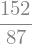

In [80]:
sympy.sympify('32/58 * (5/6 + 7/3)')

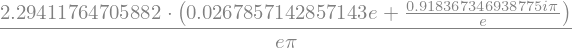

In [87]:
e_ = sympy.E
pi_ = sympy.pi
i_ = sympy.I
x =   3/7 * ( 3/48 * e_ + i_ * pi_/(7/15 * e_) ) / (17/39 * pi_ * e_) 
# ułamki jak 3/7 najpierw są wyliczane przez pythona i dopiero później mamy konwersję do sympy
x

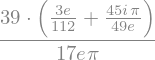

In [88]:
x =  sympy.sympify('3/7 * ( 3/48 * e_ + i_ * pi_/(7/15 * e_) ) / (17/39 * pi_ * e_)')
# Wprowadzając string i konwertując do do sympy obchodzimy powyższy problem
x

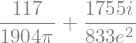

In [89]:
x = sympy.simplify(x)
x

### <a id='toc1_2_3_'></a>[Funkcje](#toc0_)

In [91]:
x, y, z = sympy.symbols("x, y, z")

In [93]:
f = sympy.Function("f")
f

f

In [94]:
type(f)

sympy.core.function.UndefinedFunction

In [95]:
f(x)

In [102]:
f.free_symbols

In [96]:
g = sympy.Function("g")(x, y, z)
g

In [98]:
type(g)

g

In [101]:
g.free_symbols

In [103]:
sympy.sin

sin

In [104]:
sympy.sin(x)

In [105]:
sympy.sin(pi * 1.5)

In [106]:
n = sympy.Symbol("n", integer=True)

In [107]:
sympy.sin(pi * n)

In [111]:
h = sympy.Lambda(x, x**2)
h

In [112]:
h(5)

In [113]:
h(1+x)

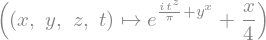

In [120]:
x, y, z, t = sympy.symbols('x y z t')
e_, pi_, i_ = sympy.E, sympy.pi, sympy.I
w = sympy.Lambda((x, y, z, t), sympy.simplify(sympy.sympify('x/4 + e_**( y**x + i_/pi_ * t**z )')))
w

### <a id='toc1_2_4_'></a>[Wyrażenia](#toc0_)

In [123]:
x = sympy.Symbol("x")

In [124]:
e = 1 + 2 * x**2 + 3 * x**3

In [125]:
e

In [126]:
e.args

In [127]:
e.args[1]

In [128]:
e.args[1].args[1]

In [129]:
e.args[1].args[1].args[0]

In [130]:
e.args[1].args[1].args[0].args

## <a id='toc1_3_'></a>[Upraszczanie wyrażeń](#toc0_)

In [131]:
expr = 2 * (x**2 - x) - x * (x + 1)
expr

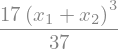

In [135]:
expr2 = sympy.sympify('17 * (x_1 + x_2)^3 / 37')
expr2

In [136]:
sympy.simplify(expr)

In [137]:
expr.simplify()

In [138]:
expr

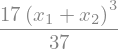

In [139]:
expr2.simplify()

In [146]:
expr = 2 * sympy.cos(x) * sympy.sin(x)
expr

In [147]:
sympy.trigsimp(expr)

In [148]:
expr.simplify()

In [151]:
expr = sympy.exp(x) * sympy.exp(y)
expr

In [152]:
sympy.powsimp(expr)

In [153]:
sympy.simplify(expr)

## <a id='toc1_4_'></a>[Rozwijanie wyrażeń](#toc0_)

In [154]:
expr = (x + 1) * (x + 2)

In [155]:
sympy.expand(expr)

In [156]:
sympy.sin(x + y).expand(trig=True)

In [157]:
a, b = sympy.symbols("a, b", positive=True)

In [158]:
sympy.log(a * b).expand(log=True)

In [159]:
sympy.exp(I*a + b).expand(complex=True)

In [160]:
sympy.expand((a * b)**x, power_exp=True)

In [161]:
sympy.exp(I*(a-b)*x).expand(power_exp=True)

## <a id='toc1_5_'></a>[Faktoryzacja](#toc0_)

In [170]:
sympy.factor(x**2 - 1)

In [171]:
sympy.factor(x * sympy.cos(y) + sympy.sin(z) * x)

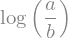

In [172]:
sympy.logcombine(sympy.log(a) - sympy.log(b))

In [173]:
expr = x + y + x * y * z
expr

In [174]:
expr.factor()

In [175]:
sympy.simplify(expr)

In [176]:
expr.collect(x)

In [177]:
expr.collect(y)

In [183]:
expr = sympy.cos(x + y) + sympy.sin(x - y)
expr

In [180]:
expr.expand(trig=True)

In [181]:
expr.expand(trig=True).collect([sympy.cos(x), sympy.sin(x)])

In [182]:
expr.expand(trig=True).collect([sympy.cos(x), sympy.sin(x)]).collect(sympy.cos(y) - sympy.sin(y))

### <a id='toc1_5_1_'></a>[Ułamki - together, apart, cancel](#toc0_)

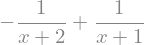

In [184]:
sympy.apart(1/(x**2 + 3*x + 2), x)

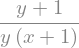

In [185]:
sympy.together(1 / (y * x + y) + 1 / (1+x))

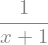

In [186]:
sympy.cancel(y / (y * x + y))

### <a id='toc1_5_2_'></a>[Podstawienia](#toc0_)

In [187]:
(x + y).subs(x ,y)

In [188]:
sympy.sin(x * sympy.exp(x)).subs(x, y)

In [189]:
sympy.sin(x * z).subs({z: sympy.exp(y), x: y, sympy.sin: sympy.cos})

In [190]:
expr = x * y + z**2 *x

In [191]:
values = {x: 1.25, y: 0.4, z: 3.2}

In [192]:
expr.subs(values)

## <a id='toc1_6_'></a>[Ewaluacja wyrażeń (NumPy)](#toc0_)

In [193]:
sympy.N(1 + pi)

In [194]:
sympy.N(pi, 50)

In [195]:
(x + 1/pi).evalf(7)

In [196]:
expr = sympy.sin(pi * x * sympy.exp(x))

In [198]:
[expr.subs(x, xv**2).evalf(4) for xv in range(0, 10)]

In [199]:
expr_func = sympy.lambdify(x, expr)

In [200]:
expr_func(1.0)

In [202]:
import numpy as np
expr_func = sympy.lambdify(x, expr, 'numpy')

In [203]:
xvalues = np.arange(0, 10)
expr_func(xvalues)

array([ 0.        ,  0.77394269,  0.64198244,  0.72163867,  0.94361635,
        0.20523391,  0.97398794,  0.97734066, -0.87034418, -0.69512687])

## <a id='toc1_7_'></a>[Rachunek różniczkowy](#toc0_)

In [205]:
f = sympy.Function('f')(x)
f

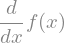

In [206]:
sympy.diff(f, x)

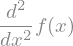

In [207]:
sympy.diff(f, x, x)

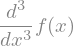

In [208]:
sympy.diff(f, x, 3)

In [210]:
g = sympy.Function('g')(x, y)
g

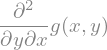

In [212]:
g.diff(x).diff(y)

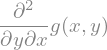

In [213]:
g.diff(x, y)

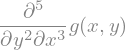

In [216]:
g.diff(x, 3, y, 2)  # Odpowiednik wywołania sympy.diff(g, x, x, x, y, y)

In [217]:
expr = x**4 + x**3 + x**2 + x + 1

In [218]:
expr.diff(x)

In [219]:
expr.diff(x, x)

In [220]:
expr = (x + 1)**3 * y ** 2 * (z - 1)

In [221]:
expr.diff(x, y, z)

In [222]:
expr = sympy.sin(x * y) * sympy.cos(x / 2)

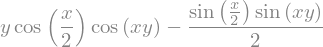

In [223]:
expr.diff(x)

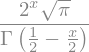

In [224]:
expr = sympy.functions.special.polynomials.hermite(x, 0)
expr

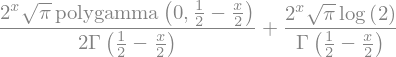

In [227]:
expr.diff(x)

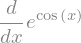

In [228]:
d = sympy.Derivative(sympy.exp(sympy.cos(x)), x)
d

In [229]:
d.doit()

## <a id='toc1_8_'></a>[Całki](#toc0_)

In [230]:
a, b = sympy.symbols("a, b")
x, y = sympy.symbols('x, y')
f = sympy.Function('f')(x)

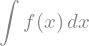

In [231]:
sympy.integrate(f)

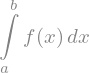

In [232]:
sympy.integrate(f, (x, a, b))

In [233]:
sympy.integrate(sympy.sin(x))

In [234]:
sympy.integrate(sympy.sin(x), (x, a, b))

In [235]:
sympy.integrate(sympy.exp(-x**2), (x, 0, oo))

In [236]:
a, b, c = sympy.symbols("a, b, c", positive=True)

In [237]:
sympy.integrate(a * sympy.exp(-((x-b)/c)**2), (x, -oo, oo))

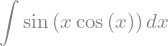

In [238]:
sympy.integrate(sympy.sin(x * sympy.cos(x)))

In [239]:
expr = sympy.sin(x*sympy.exp(y))

In [240]:
sympy.integrate(expr, x)

In [241]:
expr = (x + y)**2

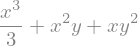

In [242]:
sympy.integrate(expr, x)

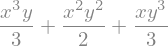

In [243]:
sympy.integrate(expr, x, y)

In [244]:
sympy.integrate(expr, (x, 0, 1), (y, 0, 1))

## <a id='toc1_9_'></a>[Szeregi](#toc0_)

In [22]:
x, y = sympy.symbols("x, y")

In [6]:
f = sympy.Function("f")(x)

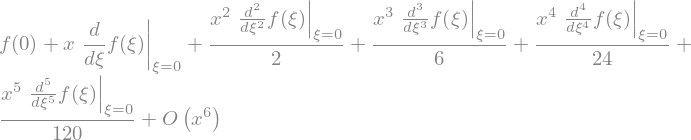

In [8]:
sympy.series(f, x)

In [10]:
x0 = sympy.sympify('x_0')
x0

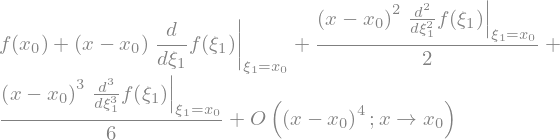

In [11]:
f.series(x, x0, n=4)

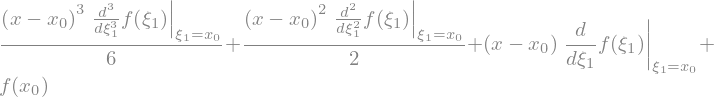

In [13]:
f.series(x, x0, n=4).removeO()

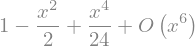

In [14]:
sympy.cos(x).series()

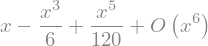

In [15]:
sympy.sin(x).series()

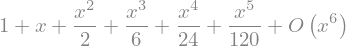

In [16]:
sympy.exp(x).series()

In [17]:
(1/(1+x)).series()

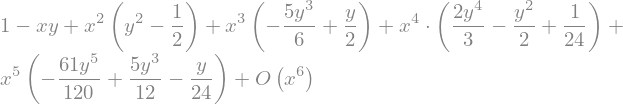

In [33]:
expr = sympy.sympify('cos(x) / ( 1 + sin(x * y) )')
expr.series(x, n=6)

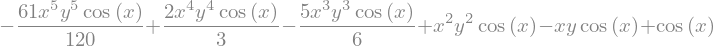

In [34]:
expr.series(y).removeO()

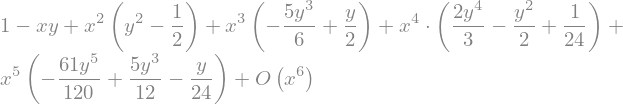

In [36]:
expr.series(y).removeO().series(x)

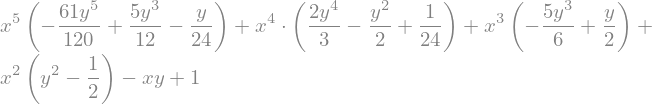

In [38]:
expr.series(y).removeO().series(x).removeO()

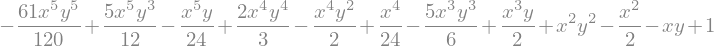

In [39]:
expr.series(y).removeO().series(x).removeO().expand()

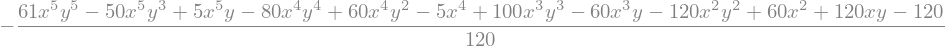

In [44]:
expr.series(y).removeO().series(x).removeO().expand().factor()

## <a id='toc1_10_'></a>[Granice](#toc0_)

In [45]:
sympy.limit(sympy.sin(x) / x, x, 0)

In [46]:
f = sympy.Function('f')
x, h = sympy.symbols("x, h")

In [47]:
diff_limit = (f(x + h) - f(x))/h

In [48]:
sympy.limit(diff_limit.subs(f, sympy.cos), h, 0)

In [49]:
sympy.limit(diff_limit.subs(f, sympy.sin), h, 0)

In [50]:
expr = (x**2 - 3*x) / (2*x - 2)

In [51]:
p = sympy.limit(expr/x, x, oo)

In [52]:
q = sympy.limit(expr - p*x, x, oo)

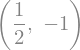

In [53]:
p, q

## <a id='toc1_11_'></a>[Sumy i iloczyny uogólnione](#toc0_)

In [54]:
n = sympy.symbols("n", integer=True)

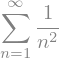

In [55]:
x = sympy.Sum(1/(n**2), (n, 1, oo))
x

In [56]:
x.doit()

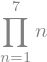

In [57]:
x = sympy.Product(n, (n, 1, 7))
x

In [58]:
x.doit()

In [59]:
x = sympy.Symbol("x")

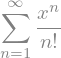

In [60]:
sympy.Sum((x)**n/(sympy.factorial(n)), (n, 1, oo))

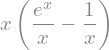

In [61]:
sympy.Sum((x)**n/(sympy.factorial(n)), (n, 1, oo)).doit()

In [62]:
sympy.Sum((x)**n/(sympy.factorial(n)), (n, 1, oo)).doit().simplify()

## <a id='toc1_12_'></a>[Równania](#toc0_)

In [63]:
x = sympy.symbols("x")

In [64]:
sympy.solve(x**2 + 2*x - 3)

In [65]:
a, b, c = sympy.symbols("a, b, c")

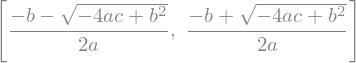

In [66]:
sympy.solve(a * x**2 + b * x + c, x)

In [67]:
sympy.solve(sympy.sin(x) - sympy.cos(x), x)

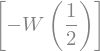

In [68]:
sympy.solve(sympy.exp(x) + 2 * x, x)

In [71]:
sympy.solve(x**5 - x**2 + 1, x)
# Niemozność rozwiązania analitycznego, ale ze zwróconym rozwiązaniem formalnym
# W tym wypadku pięć pierwiastków zespolonych równania x^5 - x^2 + 1 == 0

In [72]:
sympy.solve(sympy.tan(x) - x, x)
# Niemożność rozwiązania analitycznego i brak  rozwiązania formalnego

NotImplementedError: multiple generators [x, tan(x)]
No algorithms are implemented to solve equation -x + tan(x)

In [73]:
eq1 = x + 2 * y - 1
eq2 = x - y + 1

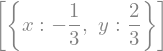

In [74]:
sympy.solve([eq1, eq2], [x, y], dict=True)

In [75]:
eq1 = x**2 - y
eq2 = y**2 - x

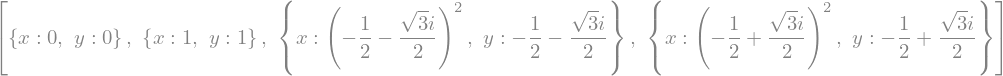

In [77]:
sols = sympy.solve([eq1, eq2], [x, y], dict=True)
sols

In [78]:
[eq1.subs(sol).simplify() == 0 and eq2.subs(sol).simplify() == 0 for sol in sols]

[True, True, True, True]

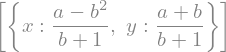

In [79]:
x, y, a, b = sympy.symbols('x y a b')
eq1 = x + b * y - a
eq2 = x - y + b
sympy.solve([eq1, eq2], [x, y], dict=True)

## <a id='toc1_13_'></a>[Algebra liniowa](#toc0_)

In [80]:
sympy.Matrix([1,2])

In [81]:
sympy.Matrix([[1,2]])

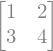

In [82]:
sympy.Matrix([[1, 2], [3, 4]])

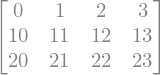

In [83]:
sympy.Matrix(3, 4, lambda m,n: 10 * m + n)

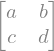

In [84]:
a, b, c, d = sympy.symbols("a, b, c, d")
M = sympy.Matrix([[a, b], [c, d]])
M

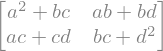

In [85]:
M * M

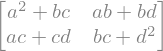

In [86]:
M**2

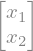

In [87]:
x = sympy.Matrix(sympy.symbols("x_1, x_2"))
x

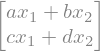

In [88]:
M * x

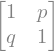

In [89]:
p, q = sympy.symbols("p, q")
M = sympy.Matrix([[1, p], [q, 1]])
M

In [90]:
b = sympy.Matrix(sympy.symbols("b_1, b_2"))
b

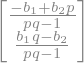

In [91]:
x = M.solve(b)
x

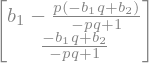

In [92]:
x = M.LUsolve(b)
x

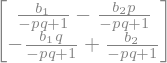

In [93]:
x = M.inv() * b
x